# 01. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [2]:
path = r"C:\Users\edriesberg\Google Drive\Instacart Basket Analysis"

In [3]:
ords_prods_cust = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust.pkl'))

In [4]:
ords_prods_cust.head(10)

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq,order_freq_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
ords_prods_cust.columns

Index(['order_id', 'user_id', 'user_order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spend', 'spend_flag', 'order_freq', 'order_freq_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       '_merge'],
      dtype='object')

## Question 3.
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
- In a markdown cell beneath your histogram, describe what the histogram demonstrates.

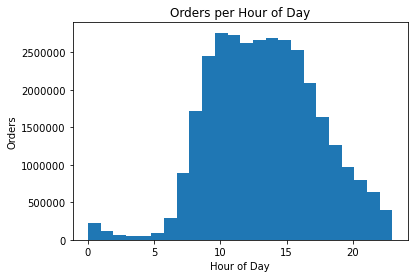

In [6]:
hist = ords_prods_cust['order_hour_of_day']
plt.hist(hist,24)
plt.xlabel('Hour of Day')
plt.ylabel('Orders')
plt.title('Orders per Hour of Day')
plt.ticklabel_format(style='plain')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_hours.png'))

The Histogram above indicates that the majority of orders occur in the middle of the day, and follow a roughly normal distribution from midnight to midnight.

## Question 4.
The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

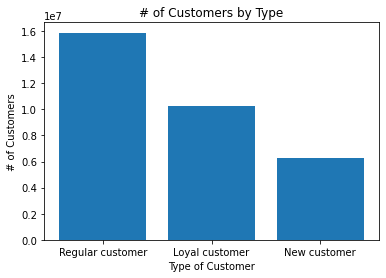

In [7]:
bar_x = ords_prods_cust['loyalty_flag'].value_counts().index.tolist()
bar_y = ords_prods_cust['loyalty_flag'].value_counts().tolist()
plt.bar(bar_x,bar_y)
plt.xlabel('Type of Customer')
plt.ylabel('# of Customers')
plt.title('# of Customers by Type')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty.png'))

## Question 5.
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [8]:
np.random.seed(31)

In [9]:
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [10]:
dev

array([ True, False, False, ...,  True, False,  True])

In [11]:
big = ords_prods_cust[dev]

In [12]:
small = ords_prods_cust[~dev]

In [13]:
df = small[['order_hour_of_day','prices']]

In [14]:
df2 = ords_prods_cust[['order_hour_of_day','prices']]

<AxesSubplot:xlabel='order_hour_of_day', ylabel='prices'>

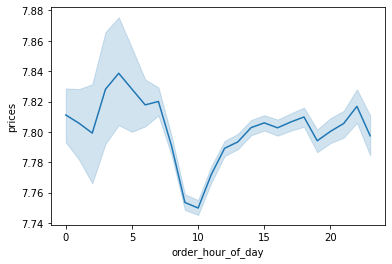

In [15]:
sns.lineplot(data = df2, x = 'order_hour_of_day',y = 'prices')

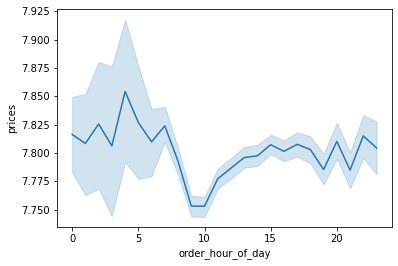

In [16]:
line = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

The line plots are similar between the full dataset, and my sample.  This means that the sample is representative of the data as a whole, and can be used for a faster analysis.

There is a different in price based on the hour of the day.  The average price increases the later into the night an order is placed.

## Question 6.
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
- In a markdown cell beneath your line chart, describe what the line chart shows.

In [17]:
df_3 = small[['n_dependants','age']]

In [18]:
df_3

,n_dependants,age
1,3,31
2,3,31
3,3,31
6,3,31
19,1,38
...,...,...
32404839,0,32
32404845,2,48
32404847,2,48
32404853,2,48


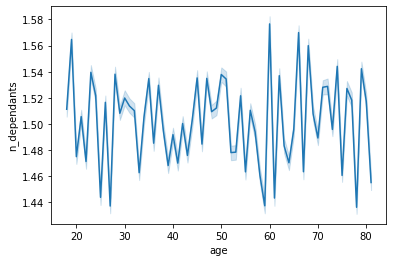

In [19]:
line_2 = sns.lineplot(data = df_3, y = 'n_dependants',x='age')

There is not a strong correlation between age and the number of dependants in the household.

## Question 7.
You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the `sns.scatterplot()` function.
- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [27]:
df_4 = small[['age','income','avg_spend']]

C:\Users\edriesberg\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


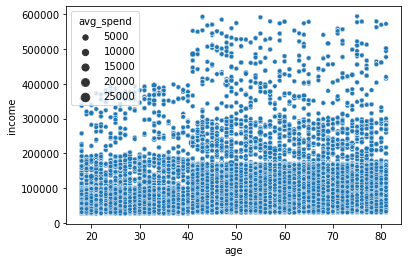

In [29]:
scatter = sns.scatterplot(data = df_4,x='age',y='income',size = 'avg_spend')

There is a notable jump in income around the 41 years of age mark.

## Question 8.
Export your visualizations as “.png” files in your relevant project folder.

In [22]:
# Completed in a previous step

# hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_hours.png'))

In [23]:
# Completed in a previous step

# bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty.png'))

In [24]:
line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_price_hour.png'))

In [25]:
line_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_age_dependant.png'))

In [26]:
scatter.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_income_age.png'))